In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# inputフォルダのファイル
import glob
for f in glob.glob("./input/*"):
    print(f)

./input\gender_submission.csv
./input\test.csv
./input\train.csv


## 必要なファイルの読み込み

In [3]:
df = pd.read_csv("./input/train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Nameカラムの削除

In [5]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#pandas.drop(index,axis,inplace)　index:名前・行列の番号　axis:0⇒行/1⇒列　inplace=True 元のデータフレームを変更/false 新しいdfを生成 

## 文字列は扱えないので値に置換

In [6]:
df.Embarked = df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
#df.Cabin = df.Cabin.replace('NaN', 0)
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
df.Age = df.Age.replace('NaN', 0)

## 変換後の値

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
5,0,3,0,NaN,0,0,8.4583,2.0
6,0,1,0,54.0,0,0,51.8625,1.0
7,0,3,0,2.0,3,1,21.0750,1.0
8,1,3,1,27.0,0,2,11.1333,1.0
9,1,2,1,14.0,1,0,30.0708,0.0


## 解析を始める

### 相関関係を算出する

In [9]:
corrmat = df.corr()
corrmat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


### 相関関係のヒートマップを確認する

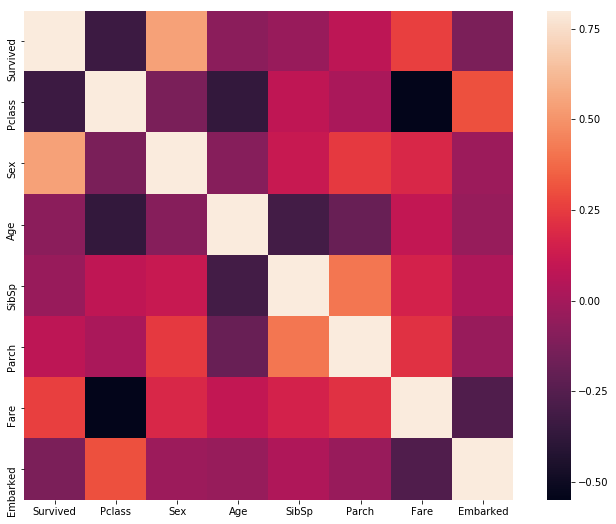

In [10]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

G:\Program Files (x86)\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


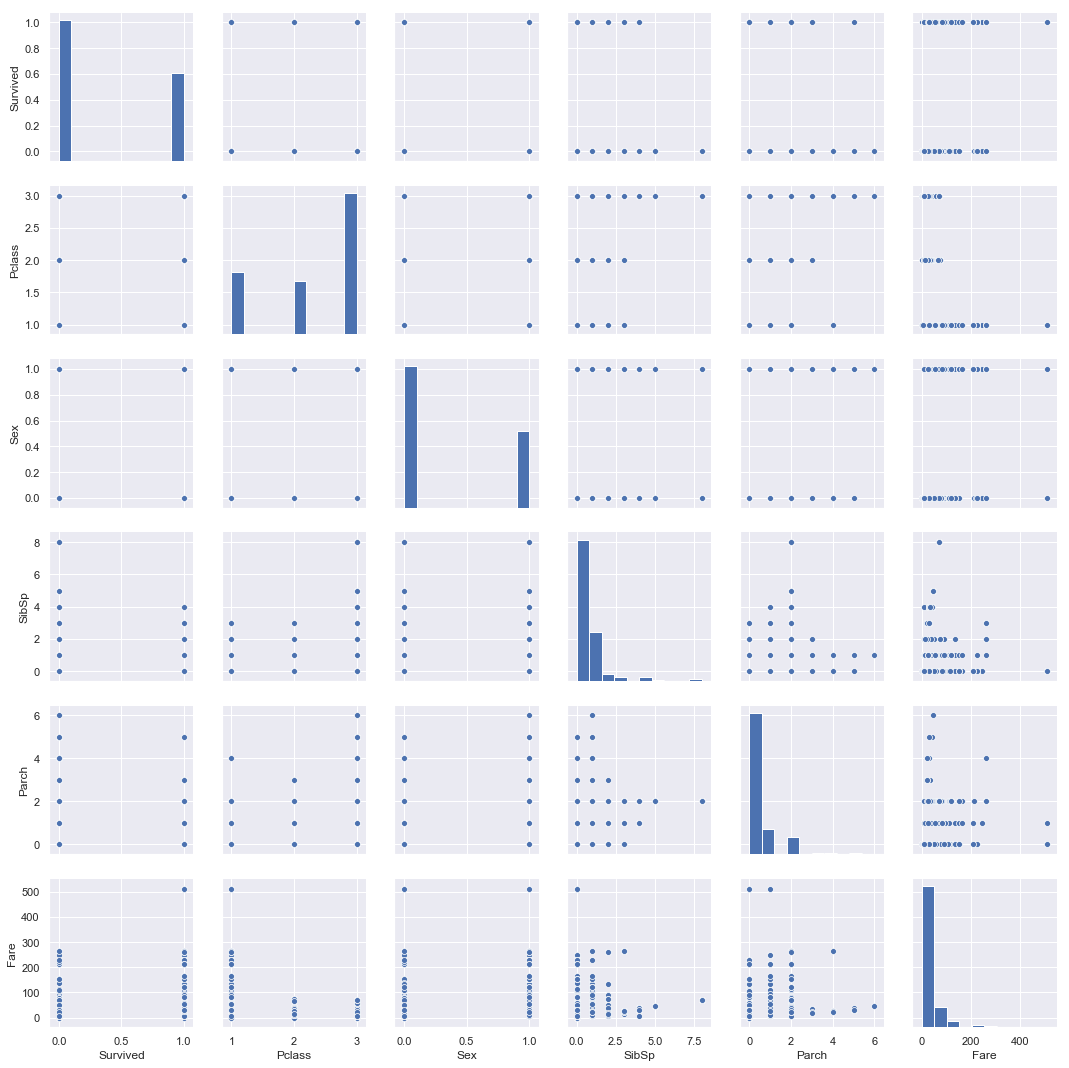

In [11]:
sns.set()
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[cols], size = 2.5)
plt.show()

## 学習

In [12]:
train_labels = df['Survived'].values
train_features = df
train_features.drop('Survived', axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

In [13]:
from sklearn import svm

#Standard = svm.LinearSVC(C=1.0, intercept_scaling=1, multi_class=False , loss="l1", penalty="l2", dual=True)
svm = svm.LinearSVC()
svm.fit(train_features, train_labels)

G:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## テスト

In [14]:
df_test = pd.read_csv("./input/test.csv")

### 事前準備

In [15]:
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
df_test.Embarked = df_test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
#df.Cabin = df.Cabin.replace('NaN', 0)
df_test.Sex = df_test.Sex.replace(['male', 'female'], [0, 1])
df_test.Age = df_test.Age.replace('NaN', 0)

In [17]:
test_features = df_test.values.astype(np.int64)

In [18]:
 # 各点を分類する
y_test_pred = svm.predict(test_features)
print(y_test_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0]


## 出力できる形式に変更

In [19]:
df_out = pd.read_csv("./input/test.csv")
df_out["Survived"] = y_test_pred

In [20]:
df_out[["PassengerId","Survived"]].to_csv("./output/submission.csv",index=False)